In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
file_path = "Renewable_Energy_Data.csv"  # Replace with the path to your file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Basic info about the dataset
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

First 5 rows of the dataset:
  Region Energy_Source  Temperature_C  Wind_Speed_m_s  Solar_Radiation_kWh_m2  \
0  North         Hydro      13.820937       14.362462                8.834648   
1  North         Solar      36.972782       19.110474                4.483191   
2   East         Hydro      33.972875        0.364652                5.104325   
3  South         Solar      -2.965160        3.915560                6.265925   
4  North          Wind      -3.813486        0.151257                9.263826   

   Rainfall_mm  Season  Efficiency_Ratio  Lagged_Production_MWh  \
0     3.350827  Winter        125.449109            1419.514155   
1    48.767157  Winter         16.325089            4769.329958   
2    40.848695  Winter        155.637061            1005.077719   
3    42.627371  Spring        675.516566            6294.250931   
4    46.898262  Spring        626.048277            5550.263638   

   Combined_Weather_Index Energy_Class  
0                1.565158       Medium  

In [3]:
# Identify categorical and numerical columns
categorical_columns = ['Region', 'Energy_Source', 'Season', 'Energy_Class']
numerical_columns = ['Temperature_C', 'Wind_Speed_m_s', 'Solar_Radiation_kWh_m2',
                     'Rainfall_mm', 'Efficiency_Ratio', 'Lagged_Production_MWh', 'Combined_Weather_Index']

# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scale numerical columns
scaler = MinMaxScaler()
scaled_data = encoded_data.copy()
scaled_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of preprocessed data
print("\nFirst 5 rows of preprocessed data:")
print(scaled_data.head())


First 5 rows of preprocessed data:
   Temperature_C  Wind_Speed_m_s  Solar_Radiation_kWh_m2  Rainfall_mm  \
0       0.415654        0.718871                0.884443     0.067018   
1       0.932680        0.957038                0.448810     0.975774   
2       0.865686        0.016721                0.510993     0.817330   
3       0.040787        0.194840                0.627283     0.852920   
4       0.021842        0.006017                0.927409     0.938378   

   Efficiency_Ratio  Lagged_Production_MWh  Combined_Weather_Index  \
0          0.007462               0.133248                0.740589   
1          0.000836               0.472099                0.740020   
2          0.009295               0.091326                0.739739   
3          0.040863               0.626353                0.736517   
4          0.037860               0.551095                0.737625   

   Region_North  Region_South  Region_West  Energy_Source_Solar  \
0          True         False        

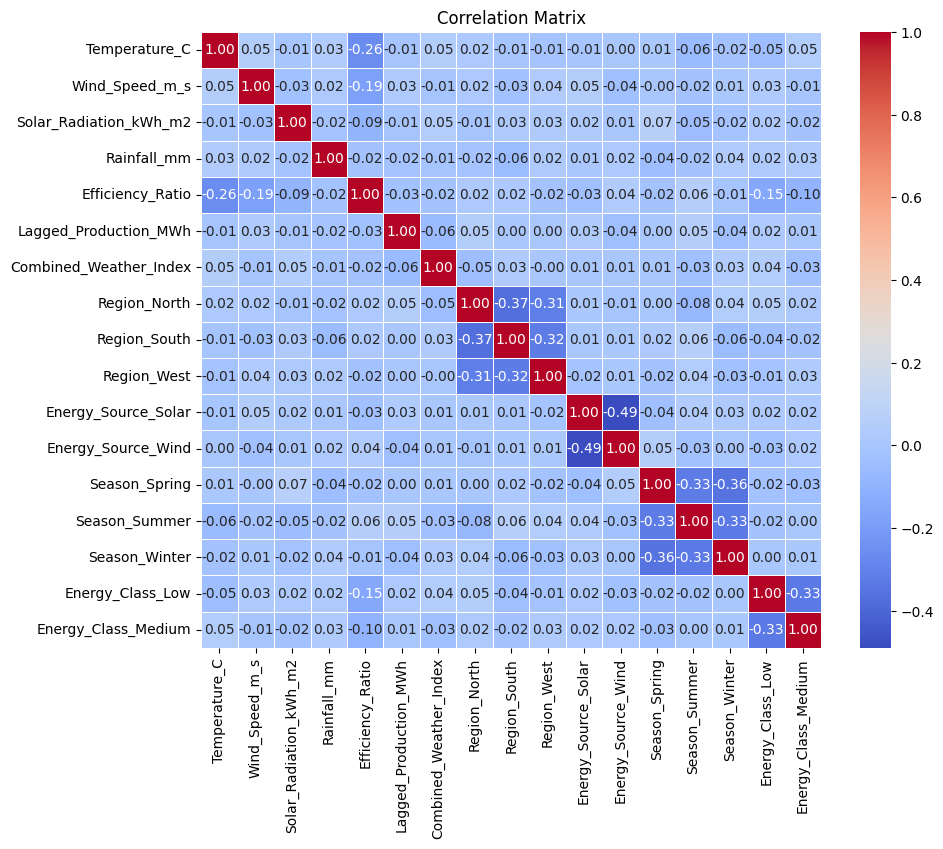

In [4]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

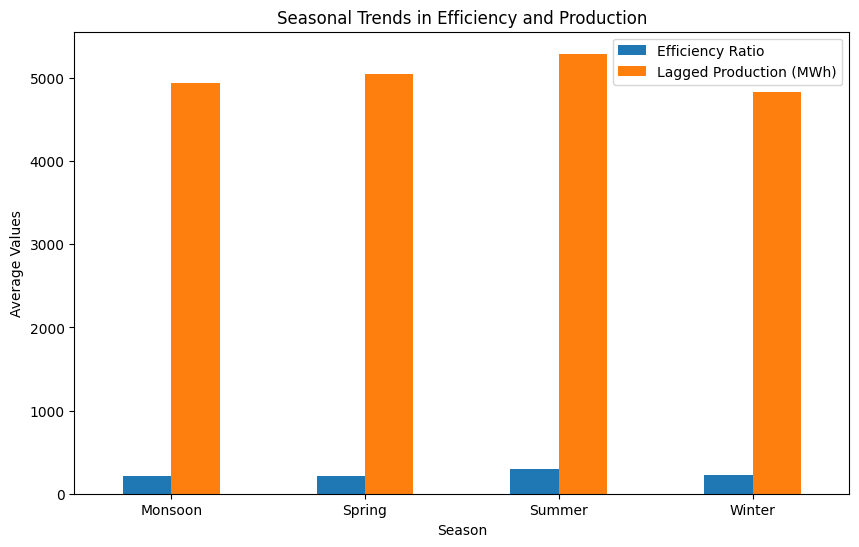

In [5]:
# Group by Season
seasonal_data = data.groupby('Season')[['Efficiency_Ratio', 'Lagged_Production_MWh']].mean()

# Plot Seasonal Trends
seasonal_data.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal Trends in Efficiency and Production')
plt.xlabel('Season')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.legend(['Efficiency Ratio', 'Lagged Production (MWh)'])
plt.show()

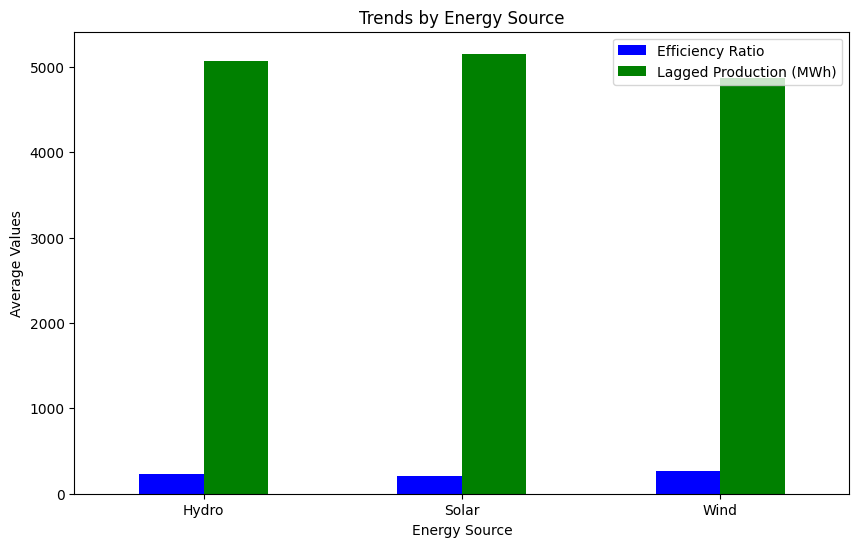

In [6]:
# Group by Energy Source
energy_source_data = data.groupby('Energy_Source')[['Efficiency_Ratio', 'Lagged_Production_MWh']].mean()

# Plot Energy Source Trends
energy_source_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Trends by Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.legend(['Efficiency Ratio', 'Lagged Production (MWh)'])
plt.show()

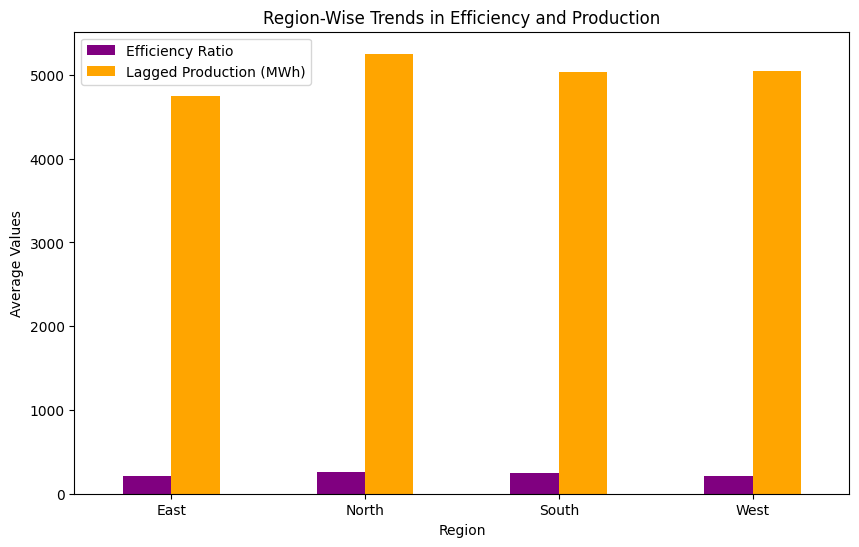

In [7]:
# Group by Region
region_data = data.groupby('Region')[['Efficiency_Ratio', 'Lagged_Production_MWh']].mean()

# Plot Region-Wise Trends
region_data.plot(kind='bar', figsize=(10, 6), color=['purple', 'orange'])
plt.title('Region-Wise Trends in Efficiency and Production')
plt.xlabel('Region')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.legend(['Efficiency Ratio', 'Lagged Production (MWh)'])
plt.show()

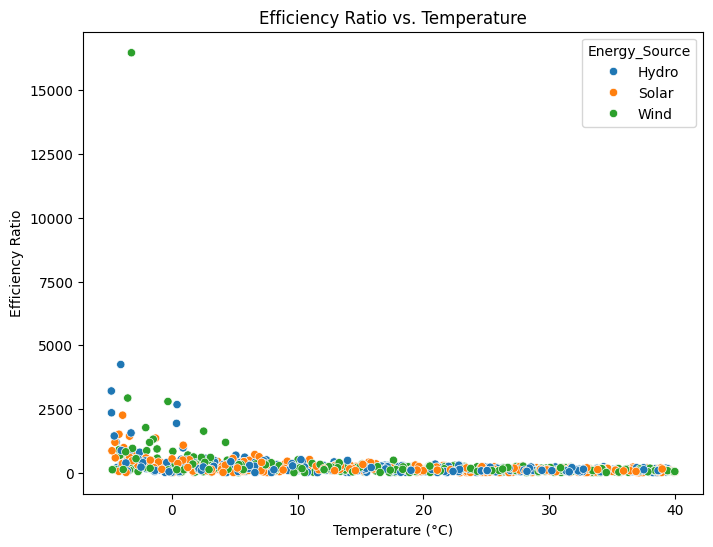

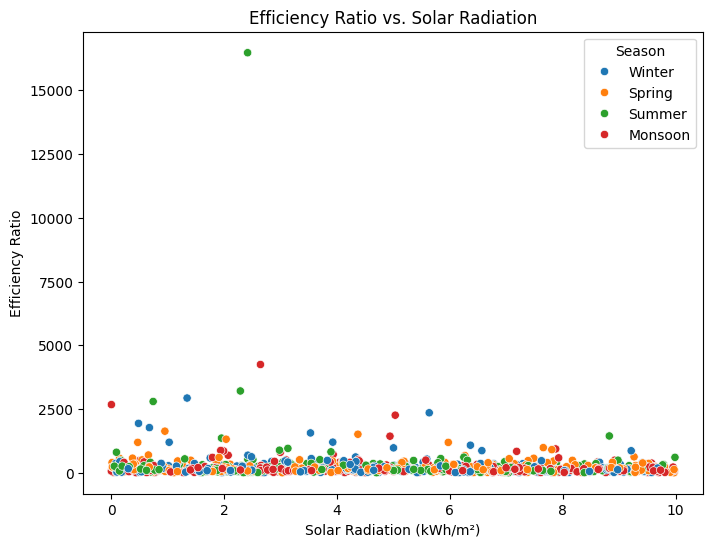

In [8]:
# Scatter Plot: Efficiency vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature_C', y='Efficiency_Ratio', hue='Energy_Source')
plt.title('Efficiency Ratio vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Efficiency Ratio')
plt.show()

# Scatter Plot: Efficiency vs Solar Radiation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Solar_Radiation_kWh_m2', y='Efficiency_Ratio', hue='Season')
plt.title('Efficiency Ratio vs. Solar Radiation')
plt.xlabel('Solar Radiation (kWh/m²)')
plt.ylabel('Efficiency Ratio')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Define features (X) and target (y)
X = scaled_data.drop(columns=['Efficiency_Ratio'])  # Drop the target column from features
y = scaled_data['Efficiency_Ratio']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

In [12]:
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [13]:
# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Results
print("Linear Regression Performance:")
print(f"  MSE: {mse_linear:.4f}")
print(f"  R²: {r2_linear:.4f}")

print("\nRandom Forest Performance:")
print(f"  MSE: {mse_rf:.4f}")
print(f"  R²: {r2_rf:.4f}")

Linear Regression Performance:
  MSE: 0.0003
  R²: 0.1831

Random Forest Performance:
  MSE: 0.0002
  R²: 0.4917


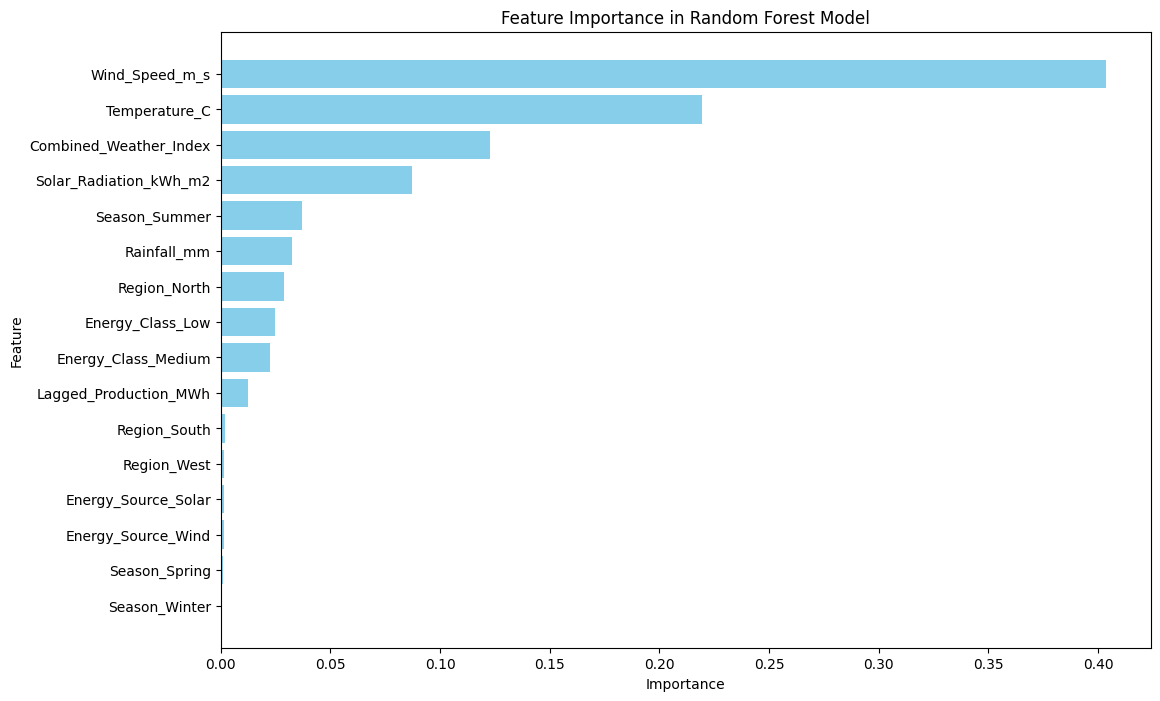

Top 10 Important Features:
                   Feature  Importance
1           Wind_Speed_m_s    0.403752
0            Temperature_C    0.219510
5   Combined_Weather_Index    0.122619
2   Solar_Radiation_kWh_m2    0.087357
12           Season_Summer    0.037076
3              Rainfall_mm    0.032307
6             Region_North    0.028989
14        Energy_Class_Low    0.024813
15     Energy_Class_Medium    0.022402
4    Lagged_Production_MWh    0.012648


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top 10 most important features
print("Top 10 Important Features:")
print(importance_df.head(10))

In [15]:
# Select the top features based on importance (e.g., top 5 features)
top_features = importance_df['Feature'][:5].tolist()  # Adjust the number of features as needed
print("Selected Top Features:", top_features)

# Filter the dataset for these features
X_selected = X[top_features]

# Split the data again with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Random Forest model with selected features
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Predict on test data
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model
mse_rf_selected = mean_squared_error(y_test, y_pred_rf_selected)
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

# Print results
print("\nPerformance with Selected Features:")
print(f"  MSE: {mse_rf_selected:.4f}")
print(f"  R²: {r2_rf_selected:.4f}")

Selected Top Features: ['Wind_Speed_m_s', 'Temperature_C', 'Combined_Weather_Index', 'Solar_Radiation_kWh_m2', 'Season_Summer']

Performance with Selected Features:
  MSE: 0.0002
  R²: 0.4648


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_selected)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

{
    "Best Parameters": best_params,
    "Cross-Validation R²": best_score,
    "Test MSE": mse_tuned,
    "Test R²": r2_tuned
}

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'Best Parameters': {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 50},
 'Cross-Validation R²': 0.05113275931337372,
 'Test MSE': 0.00021637923664005312,
 'Test R²': 0.29360966117343235}